In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

win_l = 40
win_i = 20

sit = sio.loadmat(r'D:\data\sitData.mat')['sit']
stand = sio.loadmat(r'D:\data\standData.mat')['stand']
walk = sio.loadmat(r'D:\data\walkData.mat')['walk']
sa = sio.loadmat(r'D:\data\stairAdata.mat')['stairA']
sd = sio.loadmat(r'D:\data\stairDdata.mat')['stairD']
ra = sio.loadmat(r'D:\data\rampAdata.mat')['rampA']
rd = sio.loadmat(r'D:\data\rampDdata.mat')['rampD']

data_id = []
a = []
b = []
c = []
d = []
e = []
y = []

train_size = 10000

id_shift = 0
for i in range((train_size - win_l + win_i) // win_i):
    y.append(0)
    data_id += [i + id_shift] * win_l
    a += list(sit[win_i * i : win_i * i + win_l, 0])
    b += list(sit[win_i * i : win_i * i + win_l, 1])
    c += list(sit[win_i * i : win_i * i + win_l, 2])
    d += list(sit[win_i * i : win_i * i + win_l, 3])
    e += list(sit[win_i * i : win_i * i + win_l, 4])

id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(1)
    data_id += [i + id_shift] * win_l
    a += list(stand[win_i * i : win_i * i + win_l, 0])
    b += list(stand[win_i * i : win_i * i + win_l, 1])
    c += list(stand[win_i * i : win_i * i + win_l, 2])
    d += list(stand[win_i * i : win_i * i + win_l, 3])
    e += list(stand[win_i * i : win_i * i + win_l, 4])

id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(2)
    data_id += [i + id_shift] * win_l
    a += list(walk[win_i * i : win_i * i + win_l, 0])
    b += list(walk[win_i * i : win_i * i + win_l, 1])
    c += list(walk[win_i * i : win_i * i + win_l, 2])
    d += list(walk[win_i * i : win_i * i + win_l, 3])
    e += list(walk[win_i * i : win_i * i + win_l, 4])
    
id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(3)
    data_id += [i + id_shift] * win_l
    a += list(sa[win_i * i : win_i * i + win_l, 0])
    b += list(sa[win_i * i : win_i * i + win_l, 1])
    c += list(sa[win_i * i : win_i * i + win_l, 2])
    d += list(sa[win_i * i : win_i * i + win_l, 3])
    e += list(sa[win_i * i : win_i * i + win_l, 4])
    
id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(4)
    data_id += [i + id_shift] * win_l
    a += list(sd[win_i * i : win_i * i + win_l, 0])
    b += list(sd[win_i * i : win_i * i + win_l, 1])
    c += list(sd[win_i * i : win_i * i + win_l, 2])
    d += list(sd[win_i * i : win_i * i + win_l, 3])
    e += list(sd[win_i * i : win_i * i + win_l, 4])

id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(5)
    data_id += [i + id_shift] * win_l
    a += list(ra[win_i * i : win_i * i + win_l, 0])
    b += list(ra[win_i * i : win_i * i + win_l, 1])
    c += list(ra[win_i * i : win_i * i + win_l, 2])
    d += list(ra[win_i * i : win_i * i + win_l, 3])
    e += list(ra[win_i * i : win_i * i + win_l, 4])

id_shift += (train_size - win_l + win_i) // win_i
for i in range((train_size - win_l + win_i) // win_i):
    y.append(6)
    data_id += [i + id_shift] * win_l
    a += list(rd[win_i * i : win_i * i + win_l, 0])
    b += list(rd[win_i * i : win_i * i + win_l, 1])
    c += list(rd[win_i * i : win_i * i + win_l, 2])
    d += list(rd[win_i * i : win_i * i + win_l, 3])
    e += list(rd[win_i * i : win_i * i + win_l, 4])
    
data_dic = {'id':data_id, 'a':a, 'b':b, 'c':c, 'd':d, 'e':e}
data_df = pd.DataFrame(data_dic)
label_df = pd.Series(y)

# x_train, x_test, y_train, y_test = train_test_split(data_df, label_df, test_size = 0.2, random_state = 0)

print(data_df.head())

extract_settings = ComprehensiveFCParameters()
#features = extract_relevant_features(data_df, label_df, column_id = 'id')
X_filtered = extract_relevant_features(data_df, label_df, column_id='id', default_fc_parameters=extract_settings)
X_filtered.info()
# X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size = 0.2)
X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X_filtered, y, test_size = 0.2)
X_filtered_train.info()
#cl =DecisionTreeClassifier()
#cl.fit(X_train, y_train)
#print(classification_report(y_test, cl.predict(X_test)))
#cl.n_features_

cl2 = RandomForestClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))




   id     a     b     c     d     e
0   0  3370  5189  3137  2508  5491
1   0  3387  5198  3155  2525  5508
2   0  3379  5198  3155  2525  5517
3   0  3379  5198  3155  2525  5517
4   0  3362  5172  3137  2500  5491


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [02:38<00:00,  5.28s/it]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Columns: 1517 entries, e__minimum to e__symmetry_looking__r_0.30000000000000004
dtypes: float64(1517)
memory usage: 40.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2794 entries, 1407 to 3294
Columns: 1517 entries, e__minimum to e__symmetry_looking__r_0.30000000000000004
dtypes: float64(1517)
memory usage: 32.4 MB


D:\anaconda\install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.98      1.00      0.99        92
           2       0.95      0.97      0.96       106
           3       0.89      0.94      0.92        89
           4       0.87      0.80      0.83        94
           5       0.84      0.81      0.83       107
           6       0.81      0.84      0.83        99

    accuracy                           0.91       699
   macro avg       0.91      0.91      0.91       699
weighted avg       0.91      0.91      0.91       699



In [3]:
from sklearn.model_selection import GridSearchCV
scaler = preprocessing.StandardScaler().fit(X_filtered_train)
X_filtered_train_s = scaler.transform(X_filtered_train)
X_filtered_test_s = scaler.transform(X_filtered_test)
parameters = {'gamma':[0.000001, 0.00001, 0.0001, 0.001, 0.01], 'C':np.linspace(1, 100, 20)}
gs = GridSearchCV(svm.SVC(), parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
gs.fit(X_filtered_train_s, y_train)
print('best parameter: ', gs.best_params_)
print('best efficience: ', gs.best_score_)
print('report: ', classification_report(y_test, gs.predict(X_filtered_test_s)))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.8min finished


best parameter:  {'C': 6.2105263157894735, 'gamma': 0.001}
best efficience:  0.9244810307802434
report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.99      1.00      0.99        92
           2       0.93      0.95      0.94       106
           3       0.84      0.99      0.91        89
           4       0.93      0.88      0.91        94
           5       0.89      0.77      0.82       107
           6       0.83      0.84      0.83        99

    accuracy                           0.92       699
   macro avg       0.92      0.92      0.91       699
weighted avg       0.92      0.92      0.91       699



In [9]:
from sklearn.metrics import confusion_matrix
c = svm.SVC(C = 6, kernel = 'rbf', gamma = 0.001, decision_function_shape = 'ovr')
c.fit(X_filtered_train_s, y_train)
print("train accuracy:", c.score(X_filtered_train_s, y_train))
print("test accuracy:", c.score(X_filtered_test_s, y_test))
test_pred = c.predict(X_filtered_test_s)
print(confusion_matrix(y_test, test_pred))


train accuracy: 1.0
test accuracy: 0.9155937052932761
[[111   0   0   1   0   0   0]
 [  0  92   0   0   0   0   0]
 [  0   0 101   2   3   0   0]
 [  0   0   0  88   1   0   0]
 [  0   1   4   4  83   0   2]
 [  0   0   4   4   2  82  15]
 [  0   0   0   5   1  10  83]]


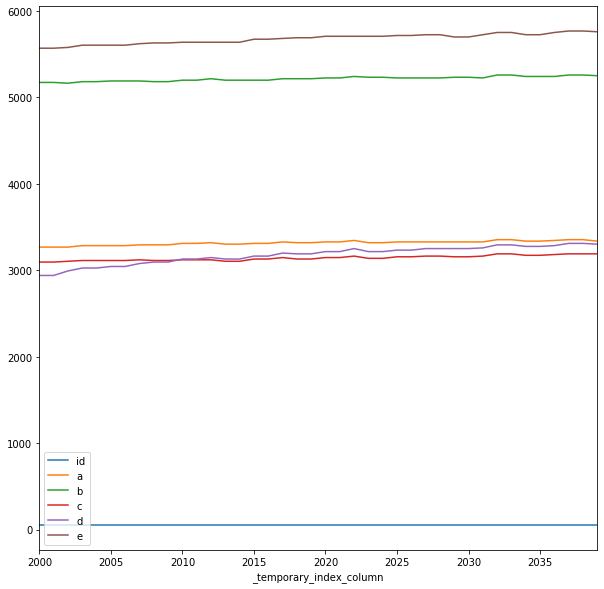

In [5]:
data_df[data_df['id'] == 50].plot(sharex = True, figsize = (10, 10))
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from tsfresh.transformers import RelevantFeatureAugmenter

pipeline = Pipeline([('augmenter', RelevantFeatureAugmenter(column_id = 'id')), ('classifier', RandomForestClassifier())])
X = pd.DataFrame(index = label_df.index)
pipeline.set_params(augmenter__timeseries_container = data_df)
pipeline.fit(X, label_df)


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [02:40<00:00,  5.34s/it]
D:\anaconda\install\lib\site-packages\tsfresh\utilities\dataframe_functions.py:170: RuntimeWarning: The columns ['a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'e__fft_coefficient__coeff_99__attr_"angle"'
 'e__fft_coefficient__coeff_99__attr_"imag"'
 'e__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [02:24<00:00,  4.82s/it]
D:\anaconda\install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in 

Pipeline(memory=None,
         steps=[('augmenter',
                 RelevantFeatureAugmenter(chunksize=None, column_id='id',
                                          column_kind=None, column_sort=None,
                                          column_value=None,
                                          default_fc_parameters=None,
                                          disable_progressbar=False,
                                          fdr_level=0.05,
                                          filter_only_tsfresh_features=True,
                                          hypotheses_independent=False,
                                          kind_to_fc_parameters=None,
                                          ml_task='auto', n_jobs=6,
                                          profile=False,
                                          profil...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth

In [7]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.preprocessing import Normalizer
fea_nparray = features.values
norm_transformer = Normalizer().fit(features)
fea_norm = norm_transformer.transform(fea_nparray)
print("feature shape: ", fea_norm.shape)
print("y shape: ", len(y))
fea_filt = SelectKBest(f_regression, k = 20).fit_transform(fea_norm, y)
print(fea_filt.shape)

NameError: name 'features' is not defined

In [ ]:
pipeline.score(X, label_df)



(54587, 10)


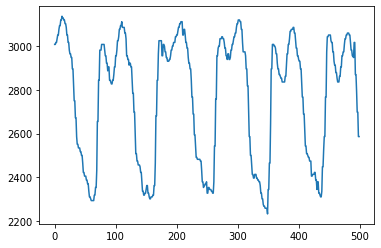

In [22]:
print(sit.shape)
draw = walk[500:1000, 0]
plt.plot(draw)
plt.savefig('SignalExample.png', dpi = 2000)
plt.show()